In [3]:
from IPython.display import Image, HTML, IFrame

 ## Making a Recommender Without Data
### @rubychilds, @nsorros

# Agenda


# Background

# The Problem

In [ ]:
Who here likes XXX?

How do you meet people who like XXX?

## People are becoming more isolated, yet we are so connected in this century by the internet

# Mission
## Reconnection of people
## Simple way of meeting people with similar interests
## Sharing treasures and knowledge that you find

# Solution
## Using an easy medium of social networks to reconnect people in the real world through grouping and recommending people

# 6Tribes Terminology

<div class="container">
<div class="row">
 <div class="col-md-6 center">
    <img src="tribe-crafty-types.png" alt="Drawing" style="width: 250px;"/> 
 </div>
  <div class="col-md-6 center">
    <img src="tribe-design-forever.png" alt="Drawing" style="width: 250px;"/> 
  </div>
</div>
</div>

# Making recommendations is Easy

# Collaborative

# Similarity search

# Projection of interests to tribes

Title: Making Recommendations without Data

Audience level: Beginner


Brief Description

As Data Scientists, we often assume we have data! It’s crazy not to. What should you recommend to a new user when you know nothing about them? In this talk we will discuss the challenges we faced, the assumption we took and the solutions we came up with while building a recommendations system for an interest based social network with limited data. 

If your proposal is accepted this will be made public and printed in the program. Should be one paragraph, maximum 400 characters.

Detailed Abstract

Introduction

The problem we were trying to solve:
6tribes: interest based social networking
Matching of user to users
Matching user to user groupings

Making recommendations is easy.

People that did X also did Y
We didn’t have any people!

Making good recommendations is hard.

User expectations are high! 
Getting lost in data exploration
Ensuring fresh recommendations
Scaling recommendation engine

Making recommendations without data is impossible. Or is it?

Engineering
Integrating and delivering continuously with CircleCI and OpBeat
Using data from Facebook and iPhone music and photo library
Enriching our data using external API’s like: HereAPI, FourSquare, Prismatic, Alchemy, iTunes


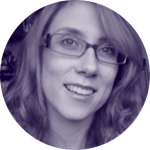

In [4]:
Image(filename="ruby.png", width=200)

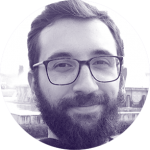

In [6]:
Image(filename="nick.png", width=200)